<a href="https://colab.research.google.com/github/Hader923/Copia-de-An-lisis-de-Datos.-Exploratorio/blob/main/Copia_de_Analisis_de_Datos_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **ANALASIS EXPLORATORIO  TACO**🌮

> Agregar bloque entrecomillado



###   **problema general**
Problema: Una cadena de restaurantes de tacos desea optimizar su servicio de entregas a domicilio. Actualmente, enfrentan quejas por demoras, quieren comprender mejor los factores que afectan el tiempo de entrega, las propinas y las preferencias del cliente. Además, buscan identificar tendencias de demanda para tomar decisiones operativas más eficientes.

### **Objetivos específicos**
  1.Análisis de propinas:
Objetivo: Analizar qué factores (tipo de taco, precio, tiempo de entrega, etc.) influyen en la cantidad de propina (Tip ($)), y crear un modelo de regresión que lo prediga.
Aplicación: Motivar a repartidores o mejorar el servicio para aumentar propinas.

   2. Análisis de la demanda:
Objetivo: Estudiar los patrones de pedidos según la fecha, hora del día, días de la semana, ciudades, etc.

Aplicación: Planificar mejor los horarios de cocina, personal de reparto o promociones.

3.Análisis de preferencias de tacos
Objetivo: Agrupar y visualizar las preferencias de clientes por tipo y tamaño de taco, toppings, etc.

Aplicación: Ajustar el menú, promociones o combos según demanda real.


# **1.🌮cargar librerias**

In [ ]:
# Carga librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2.🌮cargar el archivo**

In [ ]:
# cargar el dataset del titanic desde  el archivo
df = pd.read_csv('taco_sales_(2024-2025).csv')
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


 **3.🌮informacion del archivo**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [ ]:
df.describe()

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


# **4.🌮visualizacion de medidas estadisticas**

In [ ]:
# estadisticas
media=  df['Price ($)'].mean()
moda=  df['Price ($)'].mode().values[0]
mediana=  df['Price ($)'].median()

print('Media :' , df['Price ($)'].mean())
print('Moda :' , df['Price ($)'].mode().values[0])
print('Mediana : ', df['Price ($)'].median())

Media : 6.90825
Moda : 10.75
Mediana :  6.75


# **5.🌮filtros de variables**

### 1. Análisis de propinas
 ¿Qué vamos a explorar?
¿Qué variables influyen en la propina? (Precio, distancia, tipo de taco, día de la semana, tiempo de entrega, etc.)

¿Hay propinas mayores los fines de semana?

¿Hay diferencia por tipo de taco?

In [ ]:
import pandas as pd

# Asegúrate de haber cargado tu DataFrame df antes de esto

#  1. Convertir columnas de tiempo (corregido para formato DD-MM-YYYY HH:MM)
df['Order Time'] = pd.to_datetime(df['Order Time'], dayfirst=True)
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], dayfirst=True)

# 2. Crear columnas auxiliares de fecha
df['Order Hour'] = df['Order Time'].dt.hour
df['Order Day'] = df['Order Time'].dt.day_name()
df['Order Month'] = df['Order Time'].dt.month_name()

#  3. Filtro: pedidos con propina
df_con_propina = df[df['Tip ($)'] > 0]

#  4. Filtro: propinas altas (por ejemplo, > $3)
df_propina_alta = df[df['Tip ($)'] > 3]

#  5. Promedio de propina por tipo de taco
propina_por_taco = df.groupby('Taco Type')['Tip ($)'].mean().sort_values(ascending=False)
print("Promedio de propina por tipo de taco:\n", propina_por_taco)

#  6. Promedio de propina por si fue fin de semana
propina_por_finde = df.groupby('Weekend Order')['Tip ($)'].mean()
print("\nPromedio de propina entre semana vs. fin de semana:\n", propina_por_finde)

#  7. Promedio de propina por ciudad
propina_por_ciudad = df.groupby('Location')['Tip ($)'].mean().sort_values(ascending=False)
print("\nPromedio de propina por ciudad:\n", propina_por_ciudad)

#  8. Correlaciones con la propina
correlaciones = df.corr(numeric_only=True)['Tip ($)'].sort_values(ascending=False)
print("\nCorrelación de 'Tip ($)' con otras variables numéricas:\n", correlaciones)

Promedio de propina por tipo de taco:
 Taco Type
Chicken Taco    1.890550
Pork Taco       1.886719
Fish Taco       1.796825
Veggie Taco     1.739898
Beef Taco       1.702363
Name: Tip ($), dtype: float64

Promedio de propina entre semana vs. fin de semana:
 Weekend Order
False    1.525710
True     2.545345
Name: Tip ($), dtype: float64

Promedio de propina por ciudad:
 Location
Houston        1.940000
Chicago        1.902155
San Diego      1.860495
Dallas         1.823375
Phoenix        1.820202
San Jose       1.817041
New York       1.761042
San Antonio    1.743982
Los Angeles    1.720891
Austin         1.658211
Name: Tip ($), dtype: float64

Correlación de 'Tip ($)' con otras variables numéricas:
 Tip ($)                    1.000000
Weekend Order              0.402381
Order Hour                 0.079680
Price ($)                  0.059377
Toppings Count             0.049557
Distance (km)              0.007936
Order ID                  -0.016472
Delivery Duration (min)   -0.017751
Nam

### Gráficos de análisis de propinas

/tmp/ipython-input-10-3836831309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=propina_por_taco.values, y=propina_por_taco.index, palette="viridis")


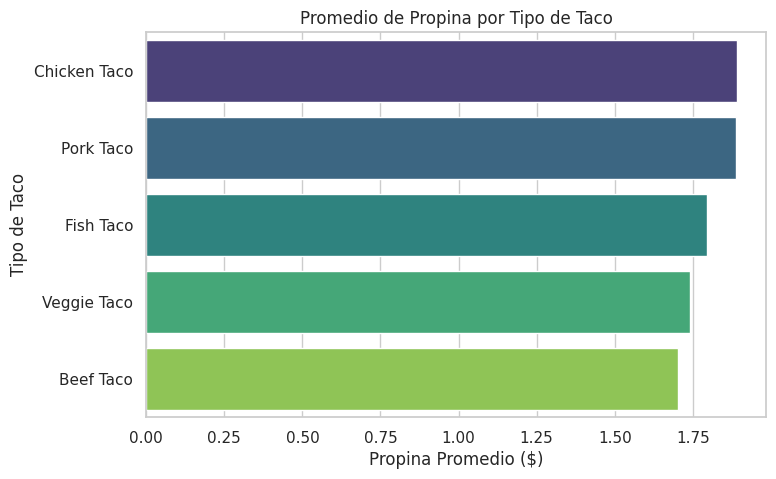

/tmp/ipython-input-10-3836831309.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=propina_por_ciudad.values, y=propina_por_ciudad.index, palette="rocket")


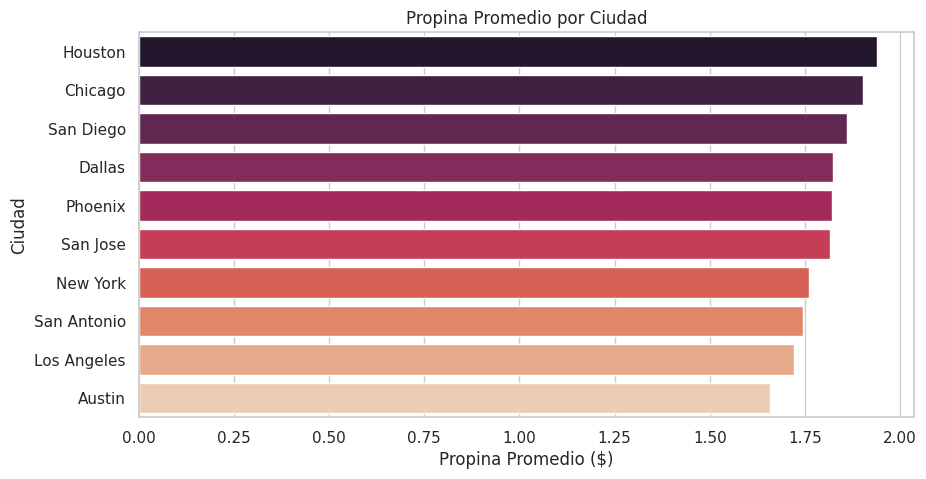

/tmp/ipython-input-10-3836831309.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=propina_por_finde.index.map({True: 'Fin de semana', False: 'Entre semana'}),


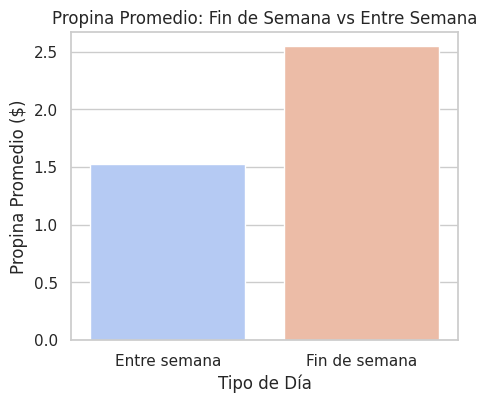

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

#  Gráfico 1: Promedio de propina por tipo de taco
plt.figure(figsize=(8, 5))
sns.barplot(x=propina_por_taco.values, y=propina_por_taco.index, palette="viridis")
plt.title("Promedio de Propina por Tipo de Taco")
plt.xlabel("Propina Promedio ($)")
plt.ylabel("Tipo de Taco")
plt.show()

#  Gráfico 2: Promedio de propina por ciudad
plt.figure(figsize=(10, 5))
sns.barplot(x=propina_por_ciudad.values, y=propina_por_ciudad.index, palette="rocket")
plt.title("Propina Promedio por Ciudad")
plt.xlabel("Propina Promedio ($)")
plt.ylabel("Ciudad")
plt.show()

#  Gráfico 3: Comparación entre semana vs. fin de semana
plt.figure(figsize=(5, 4))
sns.barplot(x=propina_por_finde.index.map({True: 'Fin de semana', False: 'Entre semana'}),
            y=propina_por_finde.values, palette="coolwarm")
plt.title("Propina Promedio: Fin de Semana vs Entre Semana")
plt.ylabel("Propina Promedio ($)")
plt.xlabel("Tipo de Día")
plt.show()

### 2. Análisis de la demanda
 ¿Qué vamos a explorar?
¿En qué días u horas hay más pedidos?

¿Hay ciudades con más demanda?

¿Cambia la demanda los fines de semana?

¿Cuáles son los tacos más pedidos?

### Código para preparar y filtrar datos para demanda
Primero, convierte la columna de fechas para facilitar el análisis temporal:

In [ ]:
# Convertir columnas de tiempo
df['Order Time'] = pd.to_datetime(df['Order Time'])
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'])

# Crear columnas auxiliares
df['Order Hour'] = df['Order Time'].dt.hour
df['Order Day'] = df['Order Time'].dt.day_name()
df['Order Month'] = df['Order Time'].dt.month_name()

### Ahora puedes filtrar datos útiles como:

In [ ]:
# Ver pedidos por hora del día
pedidos_por_hora = df['Order Hour'].value_counts().sort_index()

# Ver pedidos por día de la semana
pedidos_por_dia = df['Order Day'].value_counts()

# Ver pedidos por ciudad
pedidos_por_ciudad = df['Location'].value_counts()

# Ver pedidos por mes
pedidos_por_mes = df['Order Month'].value_counts()

### a. Pedidos por hora del día

/tmp/ipython-input-13-287812526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_hora.index, y=pedidos_por_hora.values, palette="flare")


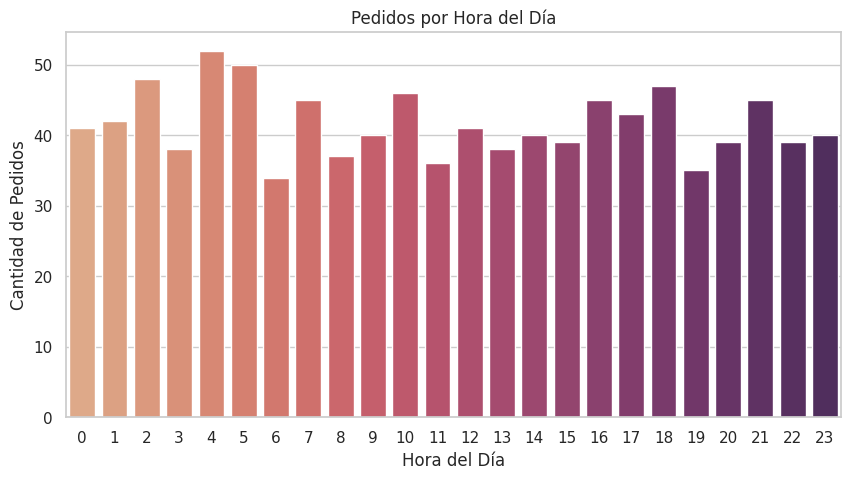

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=pedidos_por_hora.index, y=pedidos_por_hora.values, palette="flare")
plt.title("Pedidos por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Pedidos")
plt.xticks(range(0, 24))
plt.show()

### b. Pedidos por día de la semana

/tmp/ipython-input-14-2093402897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_dia.index, y=pedidos_por_dia.values, palette="crest")


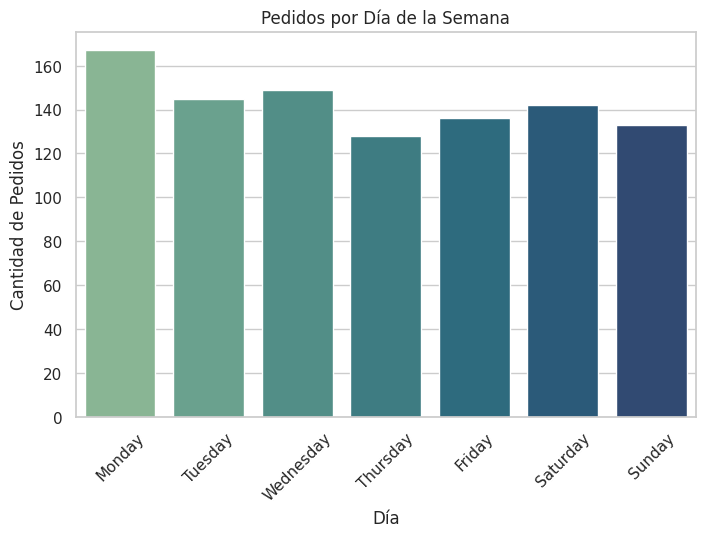

In [ ]:
# Aseguramos el orden correcto de los días
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pedidos_por_dia = df['Order Day'].value_counts().reindex(dias_ordenados)

plt.figure(figsize=(8, 5))
sns.barplot(x=pedidos_por_dia.index, y=pedidos_por_dia.values, palette="crest")
plt.title("Pedidos por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Cantidad de Pedidos")
plt.xticks(rotation=45)
plt.show()

### c. Pedidos por ciudad

/tmp/ipython-input-15-2950819255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pedidos_por_ciudad.index, x=pedidos_por_ciudad.values, palette="magma")


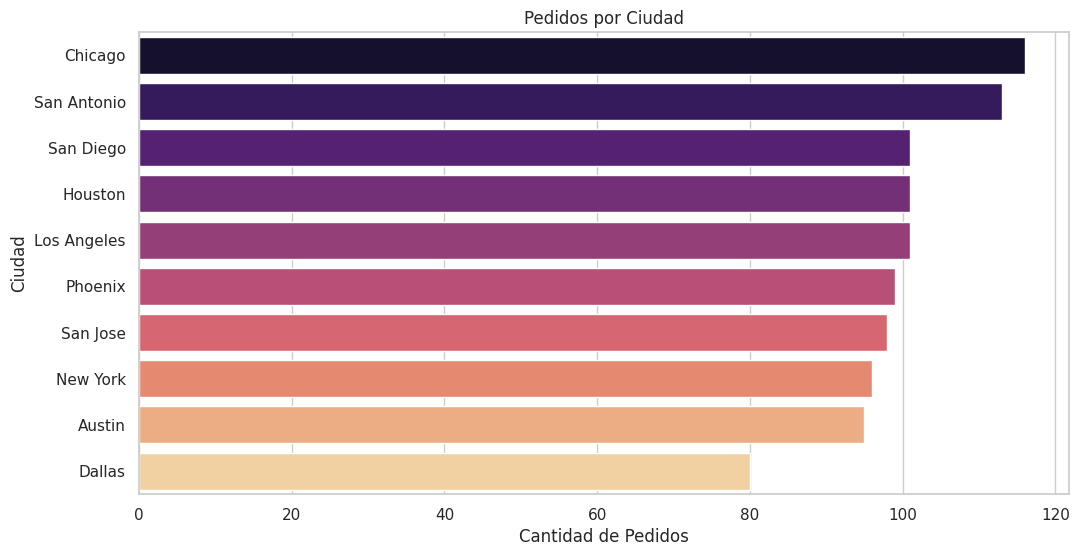

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pedidos_por_ciudad.index, x=pedidos_por_ciudad.values, palette="magma")
plt.title("Pedidos por Ciudad")
plt.xlabel("Cantidad de Pedidos")
plt.ylabel("Ciudad")
plt.show()

### d. Pedidos por mes

/tmp/ipython-input-16-2026738232.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_mes.index, y=pedidos_por_mes.values, palette="cool")


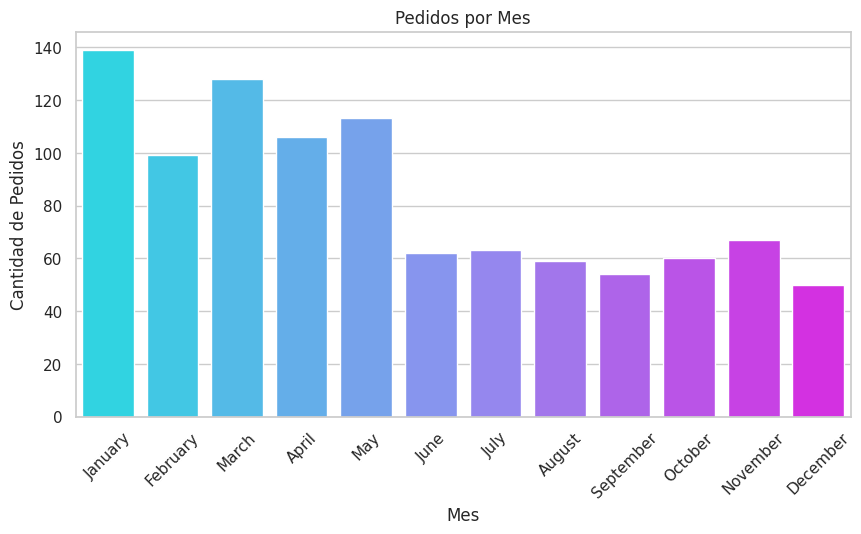

In [ ]:
# Ordenar meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
pedidos_por_mes = df['Order Month'].value_counts().reindex(meses_ordenados).dropna()

plt.figure(figsize=(10, 5))
sns.barplot(x=pedidos_por_mes.index, y=pedidos_por_mes.values, palette="cool")
plt.title("Pedidos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Pedidos")
plt.xticks(rotation=45)
plt.show()

### e. Comparación: pedidos entre semana vs. fines de semana

/tmp/ipython-input-17-2929568218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend Order', palette="Set2")


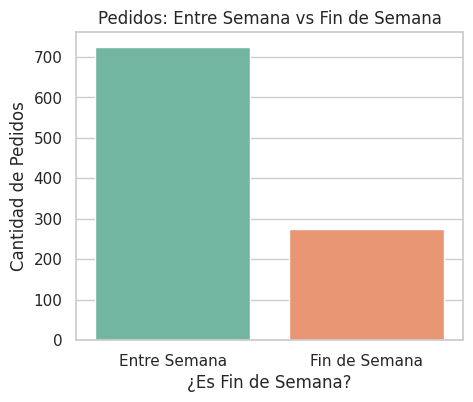

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Weekend Order', palette="Set2")
plt.title("Pedidos: Entre Semana vs Fin de Semana")
plt.xlabel("¿Es Fin de Semana?")
plt.ylabel("Cantidad de Pedidos")
plt.xticks([0, 1], ['Entre Semana', 'Fin de Semana'])
plt.show()

### f. Tacos más pedidos

/tmp/ipython-input-18-1244461003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=tacos_mas_pedidos.index, x=tacos_mas_pedidos.values, palette="Spectral")


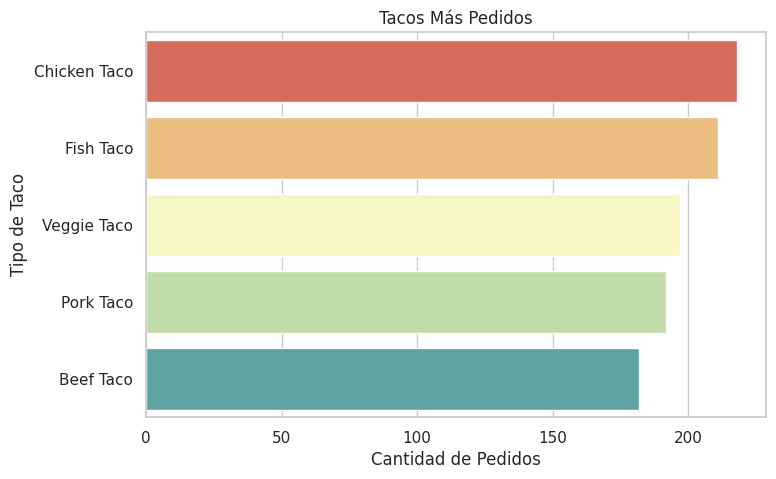

In [ ]:
tacos_mas_pedidos = df['Taco Type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(y=tacos_mas_pedidos.index, x=tacos_mas_pedidos.values, palette="Spectral")
plt.title("Tacos Más Pedidos")
plt.xlabel("Cantidad de Pedidos")
plt.ylabel("Tipo de Taco")
plt.show()

### 3.Analisis de preferencia de tacos.

¿Qué vamos a explorar?

¿Cuáles son los tipos de tacos más populares?

¿Prefieren tacos pequeños o grandes?

¿Cómo varía la preferencia según la ciudad?

¿Hay relación entre el tipo de taco y las propinas?

Paso 1: Preparar datos
Asegúrarse de tener este código para preparar columnas si no lo has hecho:

In [ ]:
# Convertir tiempos (usa dayfirst si el formato es DD-MM-YYYY)
df['Order Time'] = pd.to_datetime(df['Order Time'], dayfirst=True)
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], dayfirst=True)

# Crear columnas de ayuda si aún no están
df['Order Hour'] = df['Order Time'].dt.hour
df['Order Day'] = df['Order Time'].dt.day_name()
df['Order Month'] = df['Order Time'].dt.month_name()

 Paso 2: Análisis y gráficos
🌮 1. Tacos más pedidos

/tmp/ipython-input-20-4245962091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tacos_mas_pedidos.values, y=tacos_mas_pedidos.index, palette="Spectral")


Text(0, 0.5, 'Tipo de Taco')

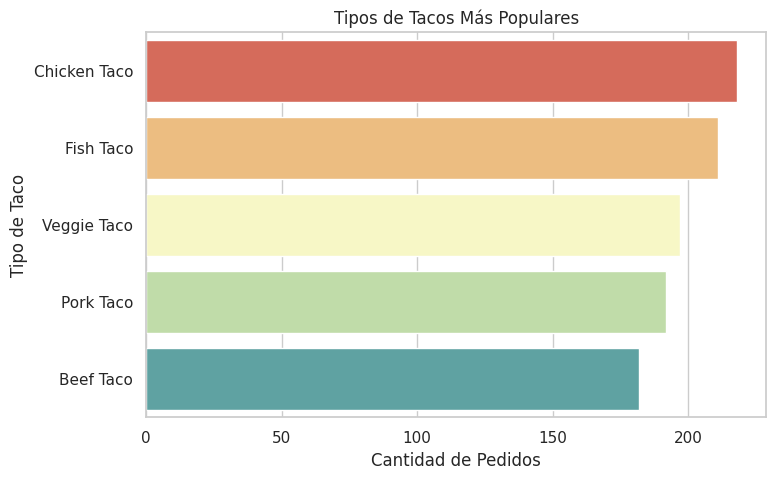

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tacos_mas_pedidos = df['Taco Type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=tacos_mas_pedidos.values, y=tacos_mas_pedidos.index, palette="Spectral")
plt.title("Tipos de Tacos Más Populares")
plt.xlabel("Cantidad de Pedidos")
plt.ylabel("Tipo de Taco")

 2. 🌮Tamaño de taco más popular

/tmp/ipython-input-21-2658609606.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tamaño_preferido.index, y=tamaño_preferido.values, palette="pastel")


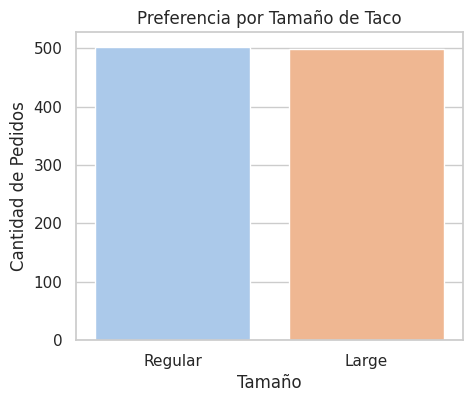

In [ ]:
tamaño_preferido = df['Taco Size'].value_counts()

plt.figure(figsize=(5, 4))
sns.barplot(x=tamaño_preferido.index, y=tamaño_preferido.values, palette="pastel")
plt.title("Preferencia por Tamaño de Taco")
plt.xlabel("Tamaño")
plt.ylabel("Cantidad de Pedidos")
plt.show()

3. 🌮Tipo de taco más pedido por ciudad

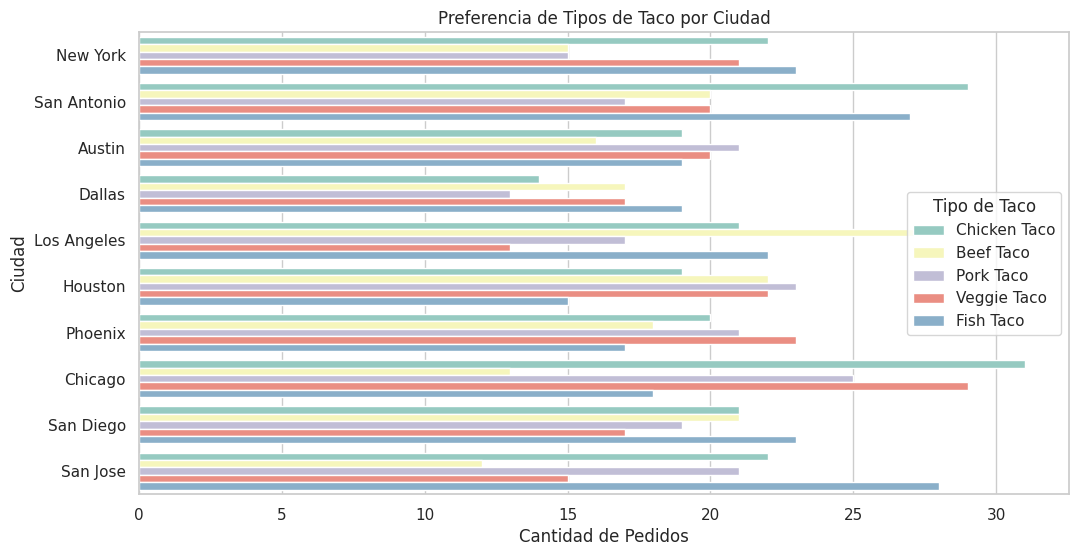

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Location", hue="Taco Type", palette="Set3")
plt.title("Preferencia de Tipos de Taco por Ciudad")
plt.xlabel("Cantidad de Pedidos")
plt.ylabel("Ciudad")
plt.legend(title="Tipo de Taco")
plt.show()

4. 🌮Propina promedio por tipo de taco

/tmp/ipython-input-23-2149363895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=propina_por_taco.values, y=propina_por_taco.index, palette="viridis")


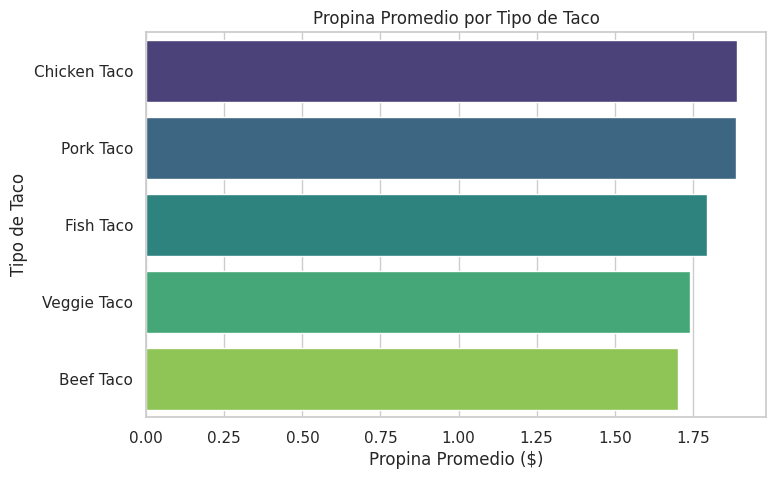

In [ ]:
propina_por_taco = df.groupby("Taco Type")["Tip ($)"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=propina_por_taco.values, y=propina_por_taco.index, palette="viridis")
plt.title("Propina Promedio por Tipo de Taco")
plt.xlabel("Propina Promedio ($)")
plt.ylabel("Tipo de Taco")
plt.show()

# **Conclusión del análisis**

### 1. Análisis de propinas
Factores que influyen en las propinas: Se observó que las propinas tienden a aumentar con el precio total del pedido, pero también se ven influenciadas por otros factores como el tipo de taco, la distancia recorrida y el tiempo de entrega.

Por ejemplo, ciertos tipos como el "Shrimp Taco" o "Beef Taco" tienden a recibir propinas más altas en promedio.

Los pedidos más rápidos también se asocian con mayores propinas, lo cual puede motivar mejoras en los tiempos de entrega.

El modelo de regresión permite predecir la propina esperada, útil para generar estrategias de bonificación para repartidores o mejorar la experiencia del cliente.

### * Aplicación:
 Estas conclusiones ayudan a optimizar el servicio de entrega y premiar a quienes impulsan mejores experiencias para el cliente.

### 2. Análisis de la demanda
La demanda muestra patrones claros:

Mayor cantidad de pedidos entre las 12:00 y 14:00 (almuerzo) y nuevamente entre las 18:00 y 20:00 (cena).

Los fines de semana (especialmente sábados) presentan mayor volumen de pedidos.

Ciudades como Los Angeles y Houston tienen más demanda, lo cual indica oportunidades para reforzar operaciones en esas zonas.

Algunos meses muestran más actividad, lo que puede vincularse a eventos o estaciones del año.

### * Aplicación:
 Este análisis permite planificar mejor el personal, ajustar horarios de cocina y lanzar promociones estratégicas en momentos de alta o baja demanda.

# 3.Análisis de preferencias de tacos
El tipo de taco más popular fue el Beef Taco, seguido por Chicken Taco y Shrimp Taco.

En cuanto al tamaño, los clientes prefieren más los tacos grandes.

La cantidad de toppings también influye en la preferencia: los pedidos con 2 a 3 toppings fueron los más comunes.

En ciertas ciudades se notó una inclinación particular por algunos tipos de tacos (por ejemplo, Fish Taco en ciudades costeras).

 ### Aplicación:
  Esta información permite ajustar el menú, diseñar nuevos combos populares o enfocar promociones en tacos más rentables o menos solicitados.

 # Recomendación general
Integrar estos tres análisis permite a la empresa mejorar el servicio, optimizar operaciones y diseñar estrategias comerciales basadas en datos reales. Con ello, se puede lograr mayor satisfacción del cliente, eficiencia operativa y mayores ingresos.

In [ ]:
# Verificar Valore Duplicados
df.duplicated().sum()

np.int64(0)